# Black Friday Dataset

1. Load the black friday data set
2. Clean the dataset
3. Perform EDA analysis.
4. Generate visualizations using matplotlib and seaborns.
5. Explain what you observe from the visualization.
6. Create Feature selection variables
7. select Target Variable
8. split the data into two parts trainingand testing.
9. start implementing the models one by one.
10. calculate the predictions for allthe three models.
11. Compare the three R^2 scores in matplotlib.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


**STEP :1Load the black friday data set**

In [5]:
df=pd.read_csv("black-friday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

**STEP 2: clean the dataset**

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df=df.fillna(0)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [11]:
df.duplicated().sum()

0

**STEP 3: EDA analysis**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False,False,False


**STEP 4:Generate visualizations using matplotlib and seaborns.**

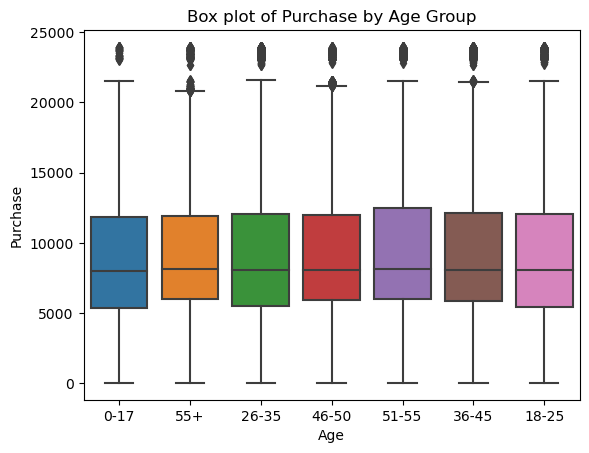

In [15]:
# Box plot for purchase distribution by age group
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Box plot of Purchase by Age Group')
plt.show()


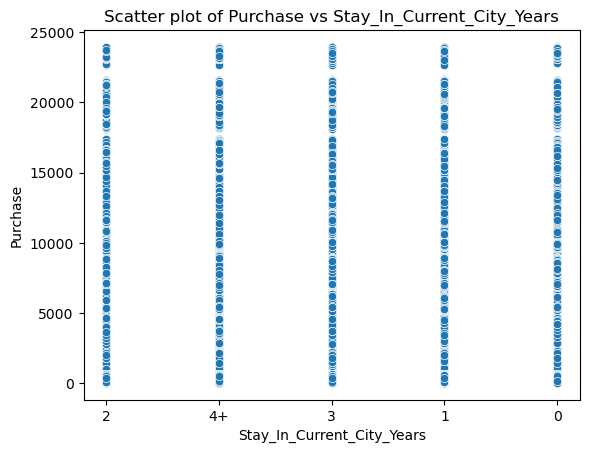

In [16]:
# Scatter plot of Purchase vs Stay_In_Current_City_Years
sns.scatterplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)
plt.title('Scatter plot of Purchase vs Stay_In_Current_City_Years')
plt.show()


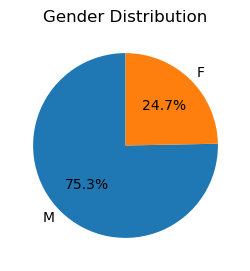

In [18]:
# Pie chart for gender distribution
gender_counts = df['Gender'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(3,3))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


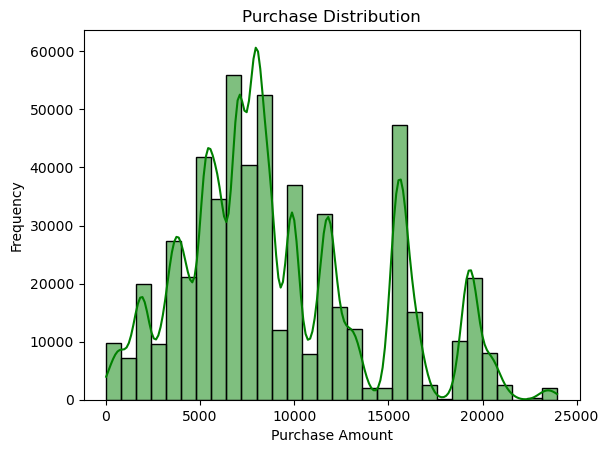

In [20]:
# Histogram for Purchase distribution
sns.histplot(df['Purchase'], kde=True, bins=30,color="green")
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


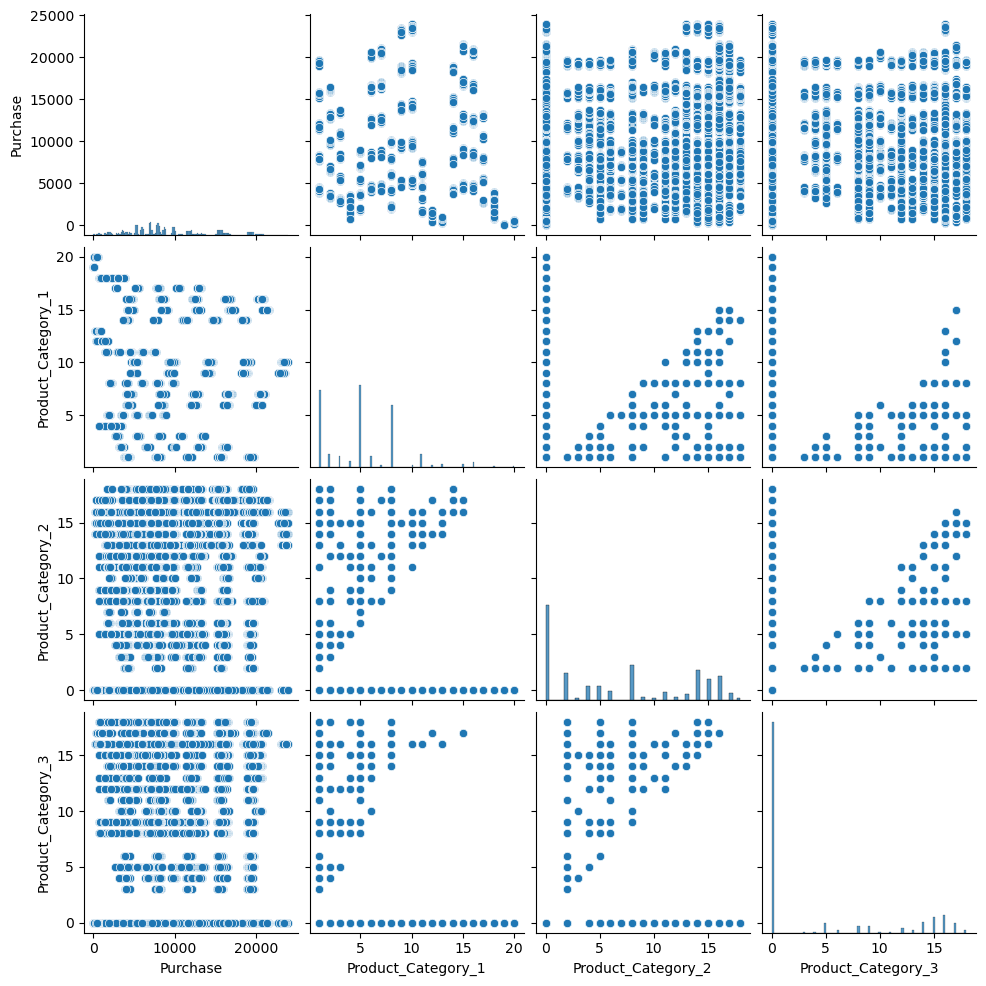

In [25]:
# Pair plot for numerical columns with custom palette
sns.pairplot(df[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']],)
plt.show()


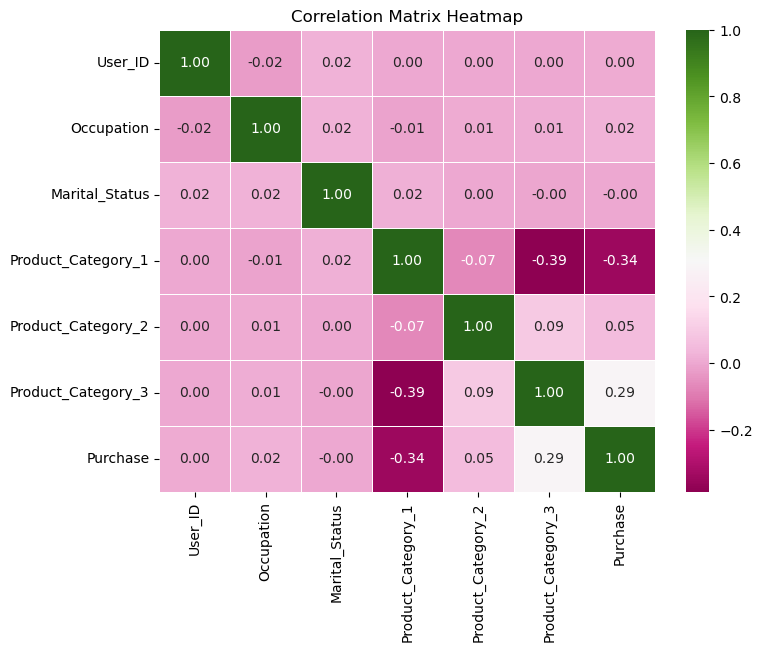

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt='.2f', cbar=True, linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


**STEP 5:Explain what you observe from the visualization.**

**STEP 6:Create Feature selection variable**

In [7]:
# 6. Create feature selection variables
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].median())
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].median())

In [9]:

# 7. Select Target Variable
y = df['Purchase']
X = df.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


In [11]:
# 8. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)

In [20]:
# Print R^2 scores
print("Linear Regression R^2 Score:", lr_r2)


Linear Regression R^2 Score: 0.12592793684162085
